# Loan Status Classification

-------------------------------------------------------------------------------------------------------------------------------

### Import required libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [51]:
df = pd.read_csv("Loan_Status_Classification.csv")
df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default


In [52]:
#Check the null values
df.isnull().sum()    

ID                   0
LIMIT_BAL            0
AGE                  0
BILL_AMT1         2008
BILL_AMT2         2506
BILL_AMT3         2870
BILL_AMT4         3195
BILL_AMT5         3506
BILL_AMT6         4020
PAY_AMT1          5249
PAY_AMT2          5396
PAY_AMT3          5968
PAY_AMT4          6408
PAY_AMT5          6703
PAY_AMT6          7173
Default Status       0
dtype: int64

In [53]:
df.shape

(30000, 16)

In [54]:
# Print all the column names
df.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default Status'],
      dtype='object')

In [55]:
# List of all the columns which has null values columns
null_columns = df.columns[df.isnull().any()]
print(null_columns)

Index(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6'],
      dtype='object')


In [56]:
for i in df.columns[df.isnull().any()]:
    i = df[i].fillna(df[i].mean(), inplace=True)

In [57]:
df.isnull().sum()

ID                0
LIMIT_BAL         0
AGE               0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
Default Status    0
dtype: int64

In [58]:
df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,30709.50416,29015.123424,28526.276559,2613.957537,689.0,2584.508988,2250.186122,2300.375885,2608.76576,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.00000,3455.000000,3261.000000,2613.957537,1.0,1.000000,1.000000,2300.375885,2.00000,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.00000,14948.000000,15549.000000,1518.000000,15.0,1.000000,1.000000,1.000000,5.00000,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.00000,28959.000000,29547.000000,2.000000,219.0,12.000000,11.000000,169.000000,1.00000,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.00000,19146.000000,19131.000000,2.000000,36681.0,1.000000,9.000000,689.000000,679.00000,Not Default


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  int64  
 3   BILL_AMT1       30000 non-null  float64
 4   BILL_AMT2       30000 non-null  float64
 5   BILL_AMT3       30000 non-null  float64
 6   BILL_AMT4       30000 non-null  float64
 7   BILL_AMT5       30000 non-null  float64
 8   BILL_AMT6       30000 non-null  float64
 9   PAY_AMT1        30000 non-null  float64
 10  PAY_AMT2        30000 non-null  float64
 11  PAY_AMT3        30000 non-null  float64
 12  PAY_AMT4        30000 non-null  float64
 13  PAY_AMT5        30000 non-null  float64
 14  PAY_AMT6        30000 non-null  float64
 15  Default Status  30000 non-null  object 
dtypes: float64(13), int64(2), object(1)
memory usage: 3.7+ MB


In [60]:
# Describe dataset
df.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,10666.660700,14.648867,32.427900,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
std,9698.091793,189.496507,12.718991,59472.881131,58305.224138,55777.906879,51825.29715,48612.594594,48042.412239,11398.052166,1.675277e+04,10956.873040,9805.177073,9756.444917,11652.208534
min,1.000000,1.000000,3.000000,-154973.000000,-69777.000000,-157264.000000,-81334.00000,-81334.000000,-94625.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,1850.500000,4.000000,26.000000,1788.000000,1847.750000,1862.000000,1782.00000,1718.000000,1724.000000,21.000000,1.900000e+01,15.000000,13.000000,13.000000,15.000000
50%,7483.500000,9.000000,33.000000,11569.000000,12637.000000,13255.000000,13350.00000,12847.000000,13398.500000,512.000000,5.150000e+02,431.000000,367.000000,387.000000,478.000000
75%,18746.250000,21.000000,41.000000,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
max,29999.000000,32768.000000,79.000000,964511.000000,983931.000000,693131.000000,891586.00000,927171.000000,961664.000000,873552.000000,1.684259e+06,417588.000000,528897.000000,426529.000000,528666.000000


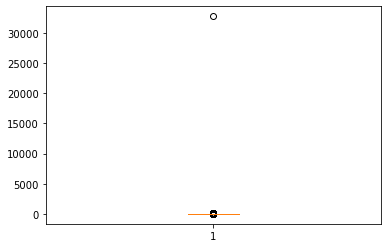

In [61]:
plt.boxplot(df.LIMIT_BAL);

In [62]:
df.loc[df.LIMIT_BAL > 100]

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
12525,12526,32768.0,42,34411.0,336175.0,33348.0,27725.0,256365.0,2436.0,11219.0,11461.0,91.0,8345.0,7783.0,92.0,Default


In [63]:
df.drop(df.loc[df['LIMIT_BAL'] == 32768.0].index, inplace=True)

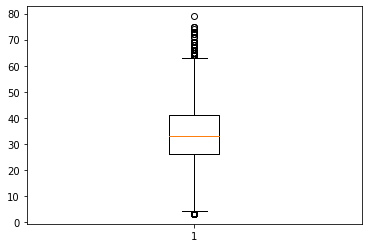

In [64]:
plt.boxplot(df.AGE);

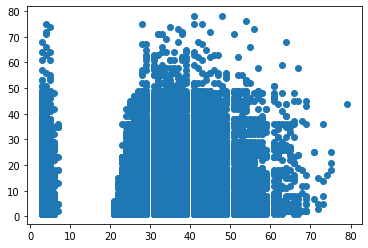

In [65]:
plt.scatter(df['AGE'],df['LIMIT_BAL'])

In [66]:
df.shape

(29999, 16)

### Label encoding

In [67]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Default Status'] = labelencoder.fit_transform(df['Default Status'])
df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,30709.50416,29015.123424,28526.276559,2613.957537,689.0,2584.508988,2250.186122,2300.375885,2608.76576,0
1,2,12.0,26,2682.0,1725.0,2682.0,3272.00000,3455.000000,3261.000000,2613.957537,1.0,1.000000,1.000000,2300.375885,2.00000,0
2,3,9.0,34,29239.0,1427.0,13559.0,14331.00000,14948.000000,15549.000000,1518.000000,15.0,1.000000,1.000000,1.000000,5.00000,1
3,4,5.0,37,4699.0,48233.0,49291.0,28314.00000,28959.000000,29547.000000,2.000000,219.0,12.000000,11.000000,169.000000,1.00000,1
4,5,5.0,57,8617.0,567.0,35835.0,294.00000,19146.000000,19131.000000,2.000000,36681.0,1.000000,9.000000,689.000000,679.00000,1


In [68]:
df.drop("ID", axis=1, inplace=True)

In [47]:
df.corr()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
LIMIT_BAL,1.000000,0.047628,0.200450,0.204307,0.193185,0.192987,0.197712,0.189178,0.077720,0.064605,0.094464,0.075072,0.076039,0.077114,0.122089
AGE,0.047628,1.000000,0.016352,0.019161,0.019174,0.018447,0.019215,0.023677,0.023355,0.013783,0.009167,0.007824,0.011968,0.013232,-0.011581
BILL_AMT1,0.200450,0.016352,1.000000,0.529816,0.505886,0.468650,0.443787,0.435344,0.006517,-0.000469,0.017391,0.010758,0.023374,0.021030,0.008853
BILL_AMT2,0.204307,0.019161,0.529816,1.000000,0.528012,0.489586,0.483181,0.459579,0.096648,0.003081,0.012531,-0.001049,0.014391,0.018964,0.007157
BILL_AMT3,0.193185,0.019174,0.505886,0.528012,1.000000,0.525304,0.490878,0.467419,0.061978,0.103812,-0.002154,-0.003457,0.002669,0.022218,0.005094
BILL_AMT4,0.192987,0.018447,0.468650,0.489586,0.525304,1.000000,0.536014,0.510549,0.036163,0.066040,0.116052,-0.010560,0.007971,0.036280,0.014018
BILL_AMT5,0.197712,0.019215,0.443787,0.483181,0.490878,0.536014,1.000000,0.557546,0.053632,0.060103,0.053884,0.125416,-0.003624,0.014970,0.004185
BILL_AMT6,0.189178,0.023677,0.435344,0.459579,0.467419,0.510549,0.557546,1.000000,0.032744,0.052716,0.049854,0.057116,0.118315,-0.014836,0.003665
PAY_AMT1,0.077720,0.023355,0.006517,0.096648,0.061978,0.036163,0.053632,0.032744,1.000000,0.259246,0.124336,0.059588,0.087078,0.126615,0.039185
PAY_AMT2,0.064605,0.013783,-0.000469,0.003081,0.103812,0.066040,0.060103,0.052716,0.259246,1.000000,0.135758,0.045953,0.175677,0.096107,0.032119


### Scaling the feature columns

In [18]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
df[["LIMIT_BAL","AGE","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]] = standardscaler.fit_transform(df[["LIMIT_BAL","AGE","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]])

In [19]:
df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,-0.952750,-0.662604,-0.505718,-0.576822,-0.572428,-0.000002,0.000156,-0.000018,0.000025,-0.133320,-0.000008,0.000021,0.000019,-0.000007,0
1,-0.128362,-0.505358,-0.526416,-0.552577,-0.536697,-0.529425,-0.525828,-0.525916,0.000025,-0.174388,-0.235797,-0.229368,0.000019,-0.223722,0
2,-0.375678,0.123629,-0.079876,-0.557690,-0.341692,-0.316035,-0.289322,-0.270141,-0.096129,-0.173553,-0.235797,-0.229368,-0.235660,-0.223464,1
3,-0.705434,0.359499,-0.492501,0.245445,0.298920,-0.046225,-0.000999,0.021228,-0.229135,-0.161376,-0.234793,-0.228348,-0.218441,-0.223808,1
4,-0.705434,1.931965,-0.426623,-0.572447,0.057678,-0.586887,-0.202934,-0.195581,-0.229135,2.015110,-0.235797,-0.228552,-0.165142,-0.165621,1


### Create a feature and target dataset

In [69]:
X  = df.drop("Default Status", axis=1)
Y = df['Default Status']

In [70]:
X

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2.0,24,3913.0,312.0,689.0,30709.50416,29015.123424,28526.276559,2613.957537,689.000000,2584.508988,2250.186122,2300.375885,2608.76576
1,12.0,26,2682.0,1725.0,2682.0,3272.00000,3455.000000,3261.000000,2613.957537,1.000000,1.000000,1.000000,2300.375885,2.00000
2,9.0,34,29239.0,1427.0,13559.0,14331.00000,14948.000000,15549.000000,1518.000000,15.000000,1.000000,1.000000,1.000000,5.00000
3,5.0,37,4699.0,48233.0,49291.0,28314.00000,28959.000000,29547.000000,2.000000,219.000000,12.000000,11.000000,169.000000,1.00000
4,5.0,57,8617.0,567.0,35835.0,294.00000,19146.000000,19131.000000,2.000000,36681.000000,1.000000,9.000000,689.000000,679.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,22.0,39,188948.0,192815.0,28365.0,884.00000,31237.000000,1598.000000,85.000000,2.000000,53.000000,347.000000,5.000000,1.00000
29996,15.0,43,1683.0,1828.0,352.0,8979.00000,519.000000,28526.276559,1837.000000,3526.000000,8998.000000,129.000000,2300.375885,2608.76576
29997,3.0,37,3565.0,3356.0,2758.0,2878.00000,2582.000000,19357.000000,2613.957537,2922.761583,22.000000,42.000000,2.000000,31.00000
29998,8.0,41,-1645.0,78379.0,7634.0,52774.00000,11855.000000,48944.000000,859.000000,349.000000,1178.000000,1926.000000,52964.000000,184.00000


In [71]:
Y.head()

0    0
1    0
2    1
3    1
4    1
Name: Default Status, dtype: int32

### Split data into training and testing sets

In [72]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [73]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(23999, 14) (23999,) (6000, 14) (6000,)


### Fit the Gaussian Naive Bayes Classifier

In [74]:
from sklearn.naive_bayes import GaussianNB

gnb  = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

### Training and testing accuracy

In [75]:
print("Training Accuracy:", gnb.score(X_train,Y_train))
print("Testing Accuracy:", gnb.score(X_test, Y_test))

Training Accuracy: 0.32247176965706903
Testing Accuracy: 0.33066666666666666


In [237]:
#Let's predict out X_test data
Y_pred = gnb.predict(X_test)

In [238]:
# Comparison between Predicted values and Actual values
comparison = pd.DataFrame(list(zip(Y_test, Y_pred)),
               columns =['Actual', 'Predicted'])
comparison[:10]

,Actual,Predicted
0,1,0
1,1,0
2,1,0
3,0,0
4,0,0
5,1,0
6,0,0
7,1,0
8,1,0
9,1,0


In [239]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [240]:
# A function to display precision score, recall score, accuracy, classification report, confusion matrix, F1 Score.

def evaluate_preds(Y_test, Y_pred):
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels on a classification.
    """
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    class_report = classification_report(Y_test, Y_pred)
    metrics_dict = {"accuracy:": round(accuracy, 2),
                    "precision:": round(precision, 2),
                    "recall:": round(recall, 2),
                    "f1:": round(f1, 2),}
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    print("\n")
    print(f"Confusion matrix:\n{conf_matrix}");
    print("\n")
    print(f"Classification Report:\n{class_report}");
    
    return metrics_dict

In [241]:
evaluate_preds(Y_test, Y_pred)

Accuracy: 33.17%
precision: 0.88
Recall: 0.16
F1 score: 0.27


Confusion matrix:
[[1240  105]
 [3905  750]]


Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.92      0.38      1345
           1       0.88      0.16      0.27      4655

    accuracy                           0.33      6000
   macro avg       0.56      0.54      0.33      6000
weighted avg       0.73      0.33      0.30      6000



{'accuracy:': 0.33, 'precision:': 0.88, 'recall:': 0.16, 'f1:': 0.27}

### Trying RandomForest

In [242]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000)

In [243]:
print("Training Accuracy:", rf.score(X_train,Y_train))
print("Testing Accuracy:", rf.score(X_test, Y_test)) 

Training Accuracy: 0.9965831909662902
Testing Accuracy: 0.7778333333333334
